In [132]:
import pandas as pd

In [133]:
df=pd.read_csv('C:/Users/kaism/Desktop/csv/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
df['Sex']=df['Sex'].map({"male":"1","female":"0"})
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna('S',inplace=True)
df.drop('Cabin',1,inplace=True)

In [135]:
df.isnull().sum().sum()

0

# Decision Tree

In [136]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [141]:
#features extraction
x=df.drop(["Survived","Name","Ticket","Embarked","PassengerId"],axis=1)
y=df["Survived"]

#Splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

#applying tree algorithm
dtree=tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print("score:{}".format(accuracy_score(y_test,y_pred)))


score:0.8379888268156425


[Text(627.75, 996.6, 'Sex <= 0.474\ngini = 0.477\nsamples = 100.0%\nvalue = [0.607, 0.393]'),
 Text(239.14285714285714, 815.4000000000001, 'Pclass <= 2.863\ngini = 0.388\nsamples = 36.2%\nvalue = [0.264, 0.736]'),
 Text(119.57142857142857, 634.2, 'gini = 0.11\nsamples = 19.2%\nvalue = [0.058, 0.942]'),
 Text(358.7142857142857, 634.2, 'gini = 0.5\nsamples = 17.0%\nvalue = [0.496, 0.504]'),
 Text(1016.3571428571429, 815.4000000000001, 'Pclass <= 2.392\ngini = 0.318\nsamples = 63.8%\nvalue = [0.802, 0.198]'),
 Text(597.8571428571429, 634.2, 'Pclass <= 1.156\ngini = 0.399\nsamples = 25.6%\nvalue = [0.725, 0.275]'),
 Text(358.7142857142857, 453.0, 'Age <= 55.999\ngini = 0.465\nsamples = 13.8%\nvalue = [0.633, 0.367]'),
 Text(239.14285714285714, 271.79999999999995, 'gini = 0.481\nsamples = 11.5%\nvalue = [0.598, 0.402]'),
 Text(478.2857142857143, 271.79999999999995, 'gini = 0.305\nsamples = 2.2%\nvalue = [0.812, 0.188]'),
 Text(837.0, 453.0, 'Age <= 10.862\ngini = 0.278\nsamples = 11.8%\nval

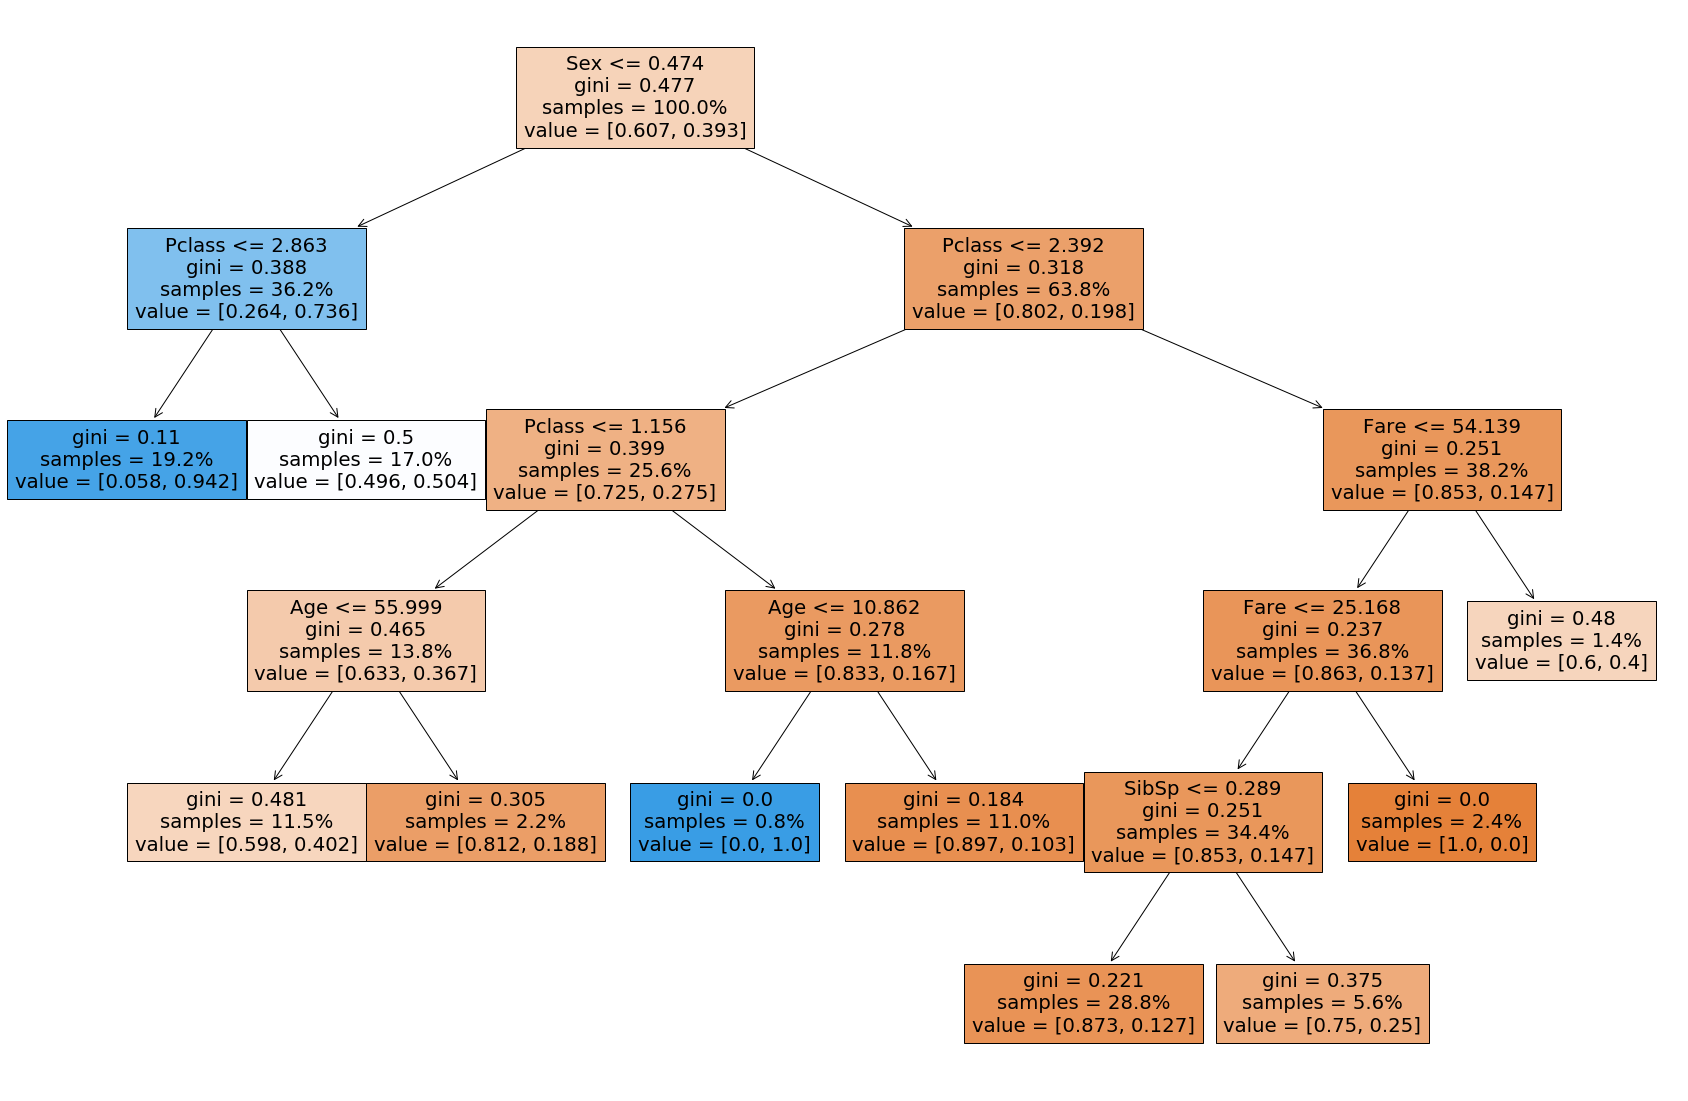

In [142]:
#Decision Tree Vizualisation
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(dtree,filled=True,feature_names=x.columns,proportion=True)

In [143]:
#Decision Tree changing parameters
dtree1=tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=20,min_samples_leaf=5,max_depth=20)
dtree1.fit(x_train,y_train)
y_pred1=dtree1.predict(x_test)
print("score:{}".format(accuracy_score(y_test,y_pred1)))

score:0.8547486033519553


# Random Forest

In [131]:
#Random Forest prediction
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)
y_pred2=clf.predict(x_test)
print('Accuracy',metrics.accuracy_score(y_test,y_pred2))

Accuracy 0.8044692737430168


In [130]:
#Random Forest prediction
clf=RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)
y_pred2=clf.predict(x_test)
print('Accuracy',metrics.accuracy_score(y_test,y_pred2))

Accuracy 0.8268156424581006
